In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
def plot_img(img, size):
  plt.figure(figsize=size)
  plt.imshow(img)

In [4]:
# I use SIFT bacause SURF is not available in provided versions of opencv 
def sift_descriptors(img1, img2):
  detector = cv.SIFT_create()
  (keypoints1, descriptors1) = detector.detectAndCompute(img1, None)
  (keypoints2, descriptors2) = detector.detectAndCompute(img2, None)

  return keypoints1, descriptors1, keypoints2, descriptors2

In [14]:
def bf_opencv_matcher(keypoints1, descriptors1, keypoints2, descriptors2, img1, img2):
  bf = cv.BFMatcher(cv.NORM_L2)
  matches = bf.match(descriptors1, descriptors2)
  matches = sorted(matches, key = lambda x:x.distance)
  img3 = cv.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  plot_img(img3, (20,20))

In [15]:
def matcher(keypoints1, descriptors1, keypoints2, descriptors2, img1, img2):
  matches = []
  for i, k1 in enumerate(descriptors1):
    for j, k2 in enumerate(descriptors2):
      matches.append(cv.DMatch(_distance=np.linalg.norm((k1 - k2)), _imgIdx=0, _queryIdx=i, _trainIdx=j))
  
  matches = sorted(matches, key = lambda x: x.distance)
  img3 = cv.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  plot_img(img3, (20,20))

In [7]:
picture1 = cv.imread("Picture1.jpg")
picture2 = cv.imread("Picture2.jpg")

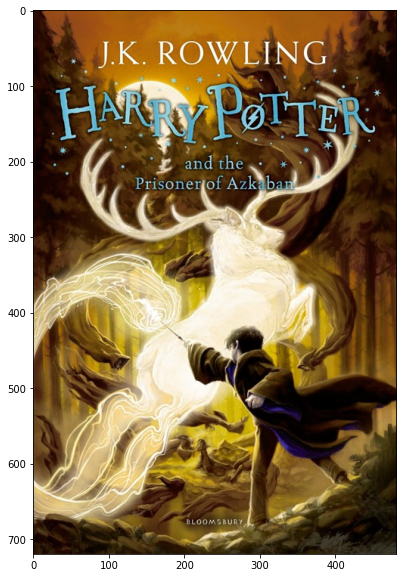

In [8]:
plot_img(picture1, (10,10))

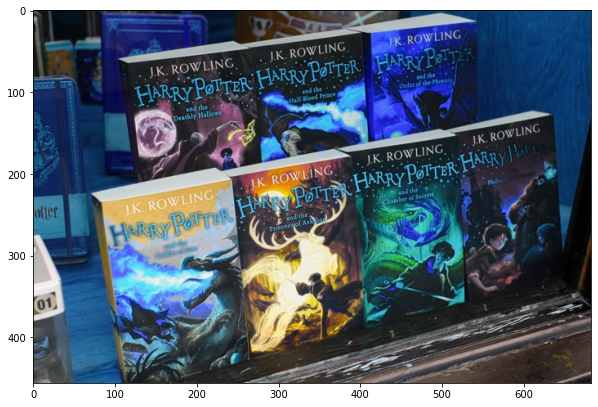

In [9]:
plot_img(picture2, (10,10))

In [10]:
keypoints1, descriptors1, keypoints2, descriptors2 = sift_descriptors(picture1, picture2)

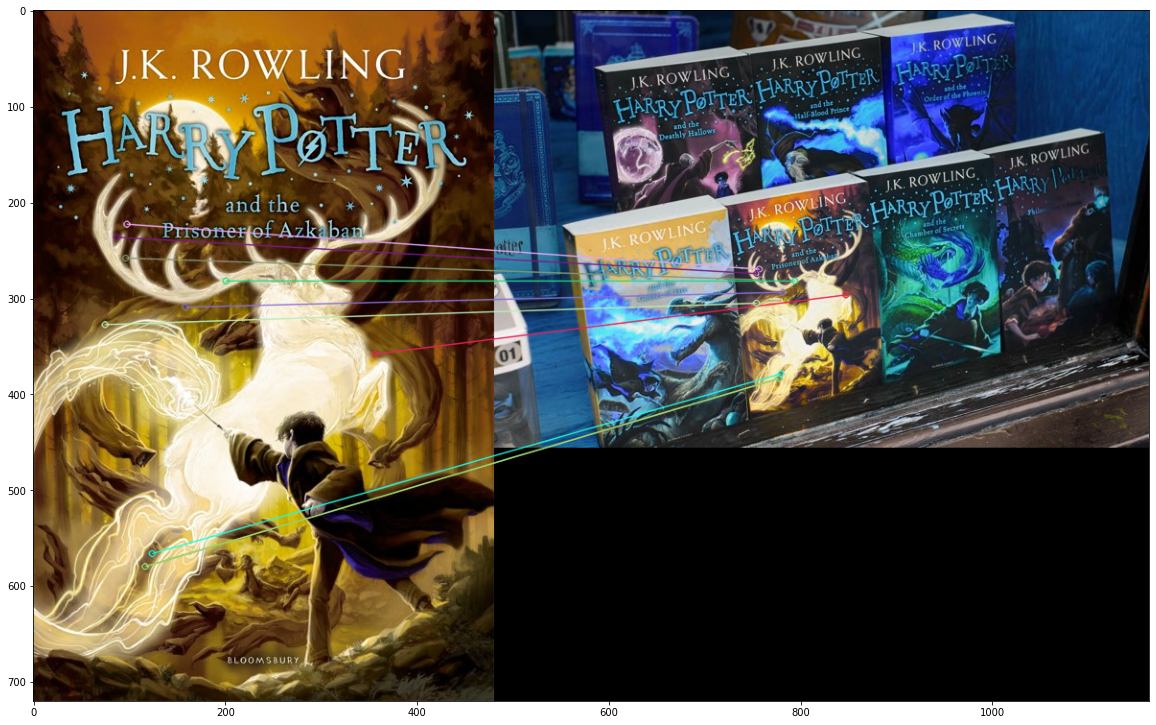

In [16]:
bf_opencv_matcher(keypoints1, descriptors1, keypoints2, descriptors2, picture1, picture2)

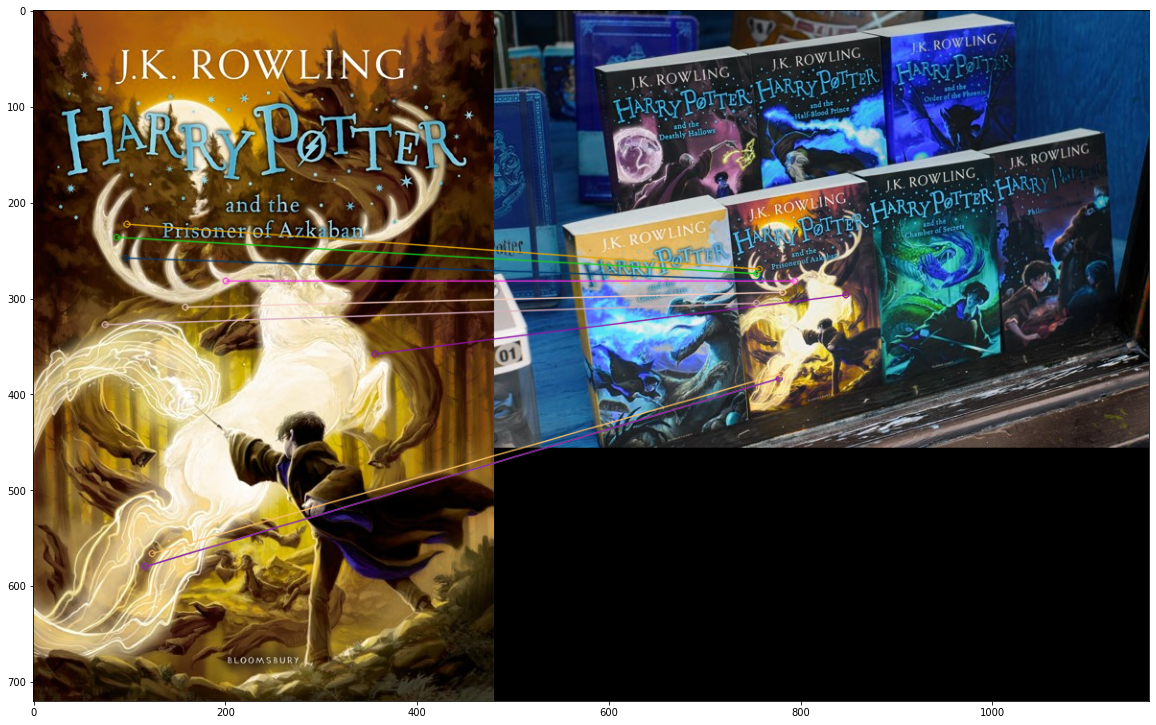

In [17]:
matcher(keypoints1, descriptors1, keypoints2, descriptors2, picture1, picture2)

In [20]:
picture3 = cv.imread("Picture3.jpeg")
picture4 = cv.imread("Picture4.jpeg")

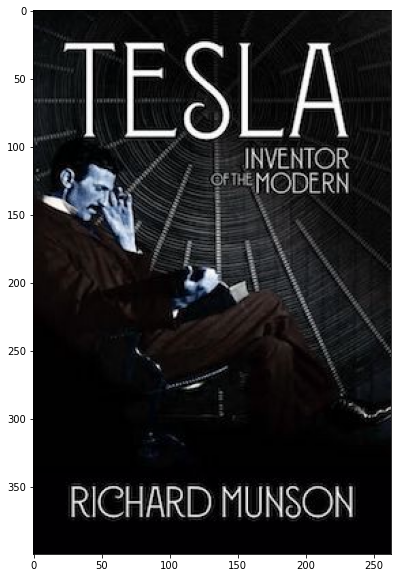

In [21]:
plot_img(picture3, (10,10))

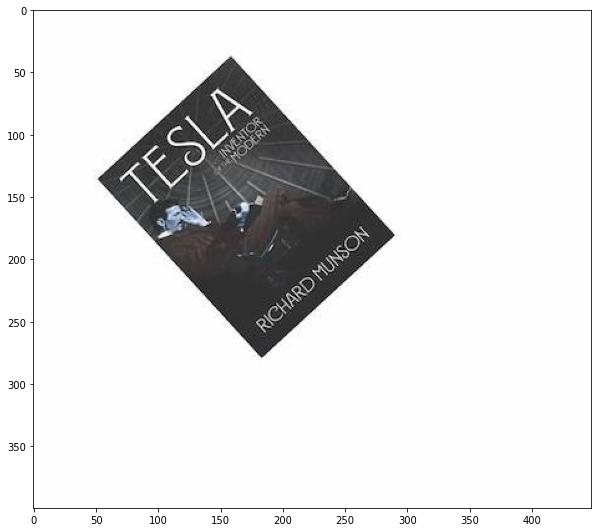

In [22]:
plot_img(picture4, (10,10))

In [23]:
keypoints1, descriptors1, keypoints2, descriptors2 = sift_descriptors(picture3, picture4)

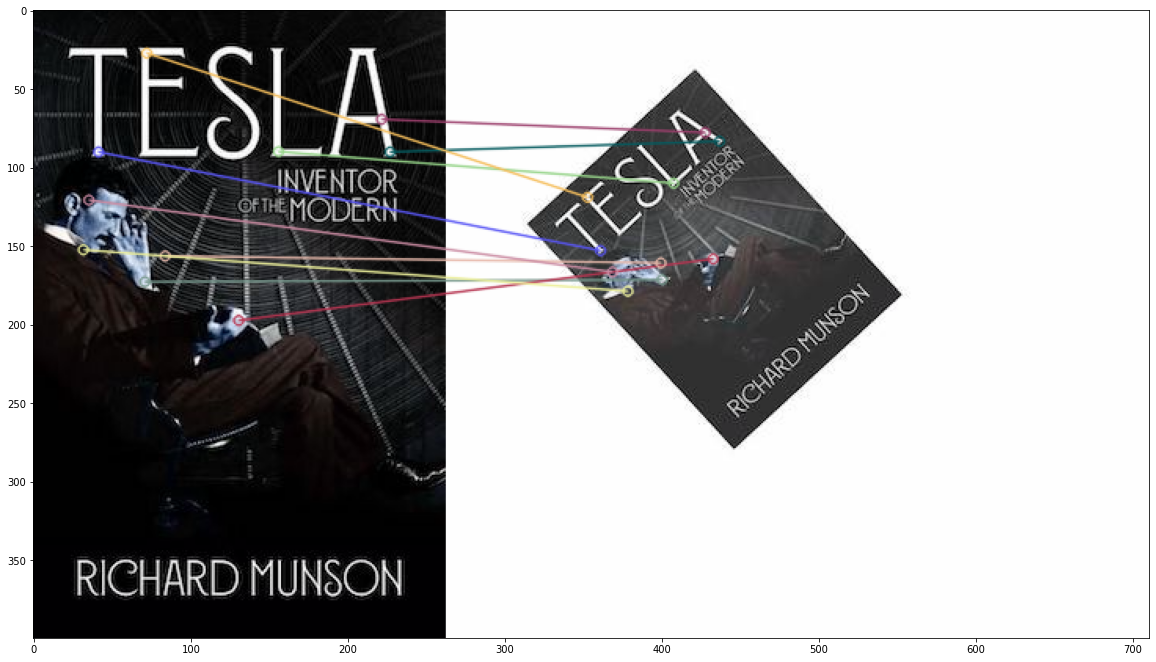

In [24]:
bf_opencv_matcher(keypoints1, descriptors1, keypoints2, descriptors2, picture3, picture4)

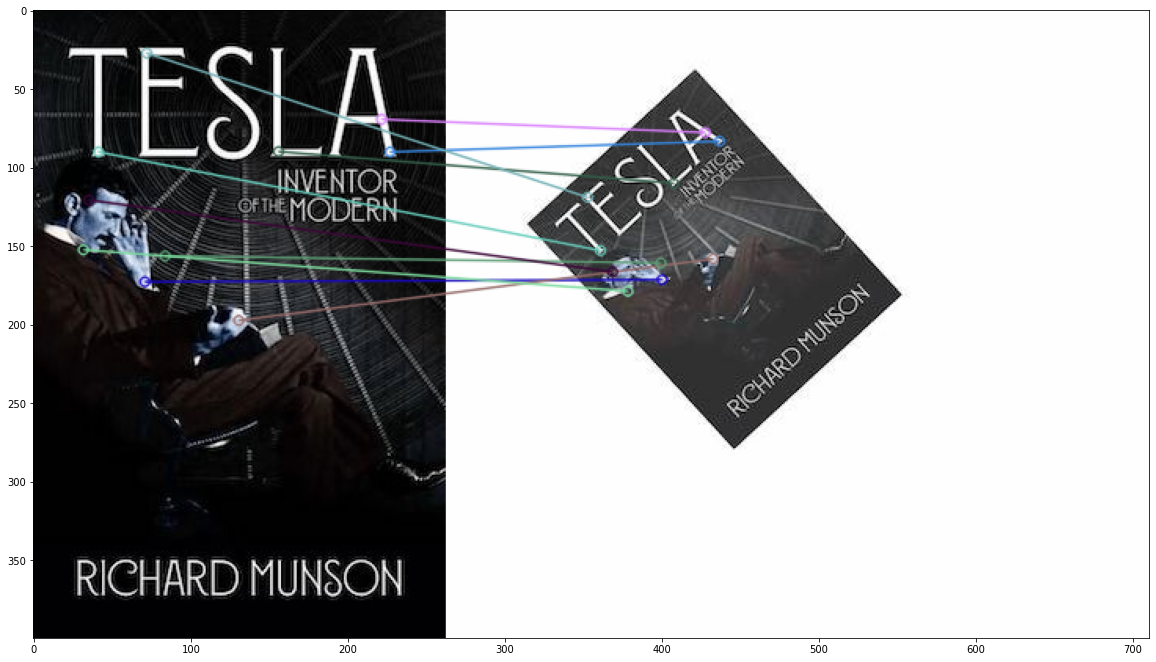

In [25]:
matcher(keypoints1, descriptors1, keypoints2, descriptors2, picture3, picture4)